In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train,t_train),(x_test,t_test)=fashion_mnist.load_data()

print('train shape=',x_train.shape,', train label shape=',t_train.shape)
print('test shape=',x_test.shape,', test label shape=',t_test.shape)

print('train label=',t_train) #학습 데이터 정답 출력
print('test label=',t_test) #데스트 데이터 정답 출력

train shape= (60000, 28, 28) , train label shape= (60000,)
test shape= (10000, 28, 28) , test label shape= (10000,)
train label= [9 0 0 ... 3 0 5]
test label= [9 2 1 ... 8 1 5]


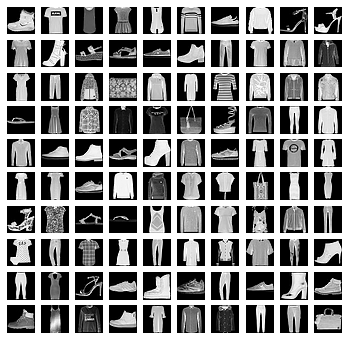

In [4]:
import matplotlib.pyplot as plt

#이미지 25개 출력
plt.figure(figsize=(6,6))

for index in range(100): #이미지 25개 출력
    plt.subplot(10,10,index+1) #5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
plt.show()

# Fashion_mnisht class
- 0:T-shirt/top
- 1:Trouse
- 2:Pullover
- 3:Dress
- 4:Coat
- 5:Sandal
- 6:Shirt
- 7:Sneaker
- 8:Bag
-9 :Ankle boot

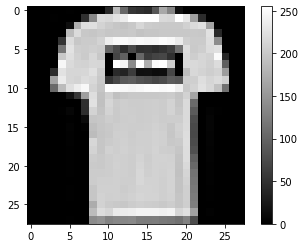

In [3]:
plt.imshow(x_train[1],cmap='gray')
plt.colorbar()
plt.show()

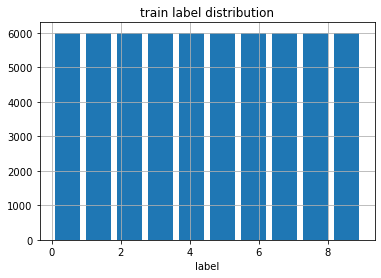

In [5]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train,bins=10,rwidth=0.8)
plt.show()

In [6]:
#학습데이터 정답 분포 확인
label_distribution=np.zeros(10)

for idx in range(len(t_train)):
    label=int(t_train[idx])
    label_distribution[label]=label_distribution[label]+1
    
print(label_distribution)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [7]:
#학습 데이터/테스트 데이터 정규화(Normalization)
x_train=(x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)

#정답 데이터 원핫 인코딩(One-Hot Encoding)
t_train=tf.keras.utils.to_categorical(t_train,num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test=tf.keras.utils.to_categorical(t_test,num_classes=10)

In [10]:
#print(x_train[0])
print(t_train[2])
print(t_test[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist=model.fit(x_train,t_train,epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5410 - accuracy: 0.8118 - val_loss: 0.4339 - val_accuracy: 0.8483
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4009 - accuracy: 0.8574 - val_loss: 0.3960 - val_accuracy: 0.8592
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3564 - accuracy: 0.8702 - val_loss: 0.3727 - val_accuracy: 0.8664
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3304 - accuracy: 0.8780 - val_loss: 0.3949 - val_accuracy: 0.8550
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3131 - accuracy: 0.8853 - val_loss: 0.3370 - val_accuracy: 0.8791
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2943 - accuracy: 0.8915 - val_loss: 0.3326 - val_accuracy: 0.8793
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.8951 - val_loss: 0.3423 - val_accuracy:

In [14]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 0s 921us/step - loss: 0.4602 - accuracy: 0.8728


[0.46015527844429016, 0.8727999925613403]

In [15]:
predictions=model.predict(x_test)

In [17]:
predictions[2]

array([5.9093645e-16, 1.0000000e+00, 3.7262354e-24, 4.0472409e-18,
       2.0570272e-19, 4.9676656e-32, 2.9364941e-24, 4.3609084e-35,
       2.1737076e-18, 6.5254256e-29], dtype=float32)

In [18]:
label=np.argmax(predictions[2])
label

1

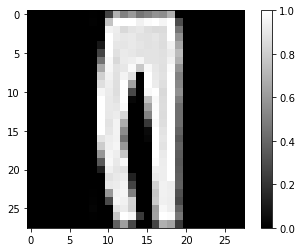

In [19]:
plt.imshow(x_test[2],cmap='gray')
plt.colorbar()
plt.show()

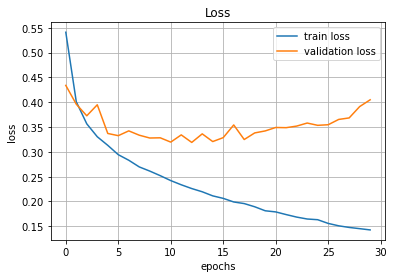

In [20]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')
plt.show()

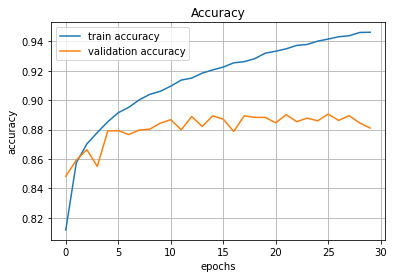

In [21]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')
plt.show()

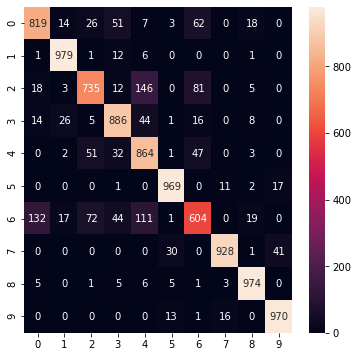

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value=model.predict(x_test)

cm=confusion_matrix(np.argmax(t_test,axis=-1),np.argmax(predicted_value,axis=-1))

sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [23]:
print(cm)
print('\n')

for i in range(10):
    print(('label=%d\t(%d/%d)\taccuracy=%.3f')%
         (i,np.max(cm[i]),np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[819  14  26  51   7   3  62   0  18   0]
 [  1 979   1  12   6   0   0   0   1   0]
 [ 18   3 735  12 146   0  81   0   5   0]
 [ 14  26   5 886  44   1  16   0   8   0]
 [  0   2  51  32 864   1  47   0   3   0]
 [  0   0   0   1   0 969   0  11   2  17]
 [132  17  72  44 111   1 604   0  19   0]
 [  0   0   0   0   0  30   0 928   1  41]
 [  5   0   1   5   6   5   1   3 974   0]
 [  0   0   0   0   0  13   1  16   0 970]]


label=0	(819/1000)	accuracy=0.819
label=1	(979/1000)	accuracy=0.979
label=2	(735/1000)	accuracy=0.735
label=3	(886/1000)	accuracy=0.886
label=4	(864/1000)	accuracy=0.864
label=5	(969/1000)	accuracy=0.969
label=6	(604/1000)	accuracy=0.604
label=7	(928/1000)	accuracy=0.928
label=8	(974/1000)	accuracy=0.974
label=9	(970/1000)	accuracy=0.970


In [24]:
#정답, 예측 값 분포 확인
label_distribution=np.zeros(10)
prediction_distribution=np.zeros(10)

for idx in range(len(t_test)):
    label=int(np.argmax(t_test[idx]))
    label_distribution[label]=label_distribution[label]+1
    prediction=int(np.argmax(predicted_value[idx]))
    prediction_distribution[prediction]=prediction_distribution[prediction]+1
    
print(label_distribution)
print(prediction_distribution)

[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[ 989. 1041.  891. 1043. 1184. 1023.  812.  958. 1031. 1028.]
